In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [251]:
df = pd.read_excel(u'../data/股票型基金半年报持仓.xlsx',
                  converters = {'SecuCode': str, 'SecuCode.1': str})

In [252]:
df.shape

(75910, 15)

In [253]:
df.head()

,ReportDate,SecuCode,SecuAbbr,NV,RRInThreeYear,AnnualizedRRInThreeYear,AssetType,RatioInNV,SecuCode.1,SecuAbbr.1,FirstIndustryName,SecondIndustryName,ThirdIndustryName,InfoPublDate,RatioInNV.1
0,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,601318,中国平安,非银行金融,保险,保险,2007-03-02,0.0356
1,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,000858,五 粮 液,食品饮料,白酒,白酒,2003-01-01,0.0313
2,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,600809,山西汾酒,食品饮料,白酒,白酒,2003-01-01,0.0200
3,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,000651,格力电器,家电,白色家电,白色家电,2003-01-01,0.0197
4,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,002157,正邦科技,农林牧渔,牧业,饲料,2007-08-31,0.0105


In [254]:
for ind in df['FirstIndustryName'].unique():
    print(ind)

非银行金融
食品饮料
家电
农林牧渔
医药
石油石化
电子元器件
国防军工
轻工制造
机械
基础化工
传媒
银行
建筑
房地产
汽车
餐饮旅游
建材
钢铁
通信
计算机
电力设备
综合
商贸零售
交通运输
纺织服装
煤炭
有色金属
电力及公用事业


In [255]:
# for ind in df['SecondIndustryName'].unique():
#     print(ind)

保险
白酒
白色家电
牧业
其他医药医疗
油田服务
半导体
航空航天
造纸
证券
运输设备
化学制品
传媒
股份制与城商行
化学制药
食品
建筑施工
房地产开发管理
乘用车
景区和旅行社
水泥
工程机械
化学原料
普钢
电信运营
其他军工
通信设备制造
计算机软件
新能源设备
计算机硬件
增值服务
其他元器件
IT服务
电子设备
中药生产
综合
小家电
零售
生物医药
农用化工
国有银行
汽车零部件
航空机场
其他专用设备
通用设备
兵器兵装
玻璃
公交物流
品牌服饰
酒店及餐饮
石油化工
仪器仪表
煤炭开采洗选
输变电设备
电站设备
贵金属
稀有金属
发电及电网
环保及公用事业
信托及其他
其他建材
航运港口
公路铁路
其他饮料
商用车
建筑装修
照明设备及其他
摩托车及其他
合成纤维及树脂
其他轻工
纺织制造
石油开采
农业
工业金属
贸易
其他钢铁
林业
渔业
煤炭化工
黑色家电
金属制品
房地产服务
汽车销售及服务


In [256]:
for ind in df['ThirdIndustryName'].unique():
    print(ind)

保险
白酒
白色家电
饲料
畜牧养殖
医疗服务
油田服务
半导体
航天军工
造纸
证券
铁路交通设备
其他化学制品
平面媒体
股份制银行
化学制剂
乳制品
建筑施工
住宅地产
乘用车
旅行社
水泥
工程机械
聚氨酯
城商行
板材
电信运营
其他军工
系统设备
网络覆盖优化与运维
行业应用软件
光伏
PC及服务器硬件
基础软件及套装软件
日用化学品
增值服务
互联网
其他元器件
广播电视
系统集成及IT咨询
整合营销
电子设备
中成药
电影动画
其他食品
教育
小家电
风电
连锁
生物医药
农药
国有银行
汽车零部件
医疗器械
通信终端及配件
医药流通
化学原料药
机场
其他专用机械
其他通用机械
调味品
矿山冶金机械
兵器兵装
玻璃
物流
大众品牌
酒店
超市
其他化学原料
航空
炼油
肉制品
仪器仪表
长材
炼焦煤
景区
高端及奢侈品
动物疫苗
机床设备
二次设备
电站设备
黄金
稀有金属
水电
航空军工
环保
基础件
其他非银金融
专用计算机设备
一次设备
新型建材及非金属新材料
港口
动力煤
公路
商业地产
火电
其他饮料
涂料涂漆
客车
卡车
建筑装修
起重运输设备
其他石化
照明设备
摩托车及其他
涤纶
氟化工
包装
其他轻工
综合
体育及户外
啤酒
休闲快时尚
服装及服饰制品
树脂
百货
园区
磷肥
航运
氮肥
石油开采
种子
铝
专用汽车
橡胶制品
贸易
燃气
铜
民爆用品
线缆
棉纺制品
特钢
农产品加工及流通
信托
印刷
镍钴
网络接配及塔设
陶瓷
餐饮
IT外包服务
无烟煤
电网
果蔬饮料
水务
铁路
林木及加工
公交
海洋捕捞
氯碱
铅锌
塑料制品
船舶制造
核电
其他煤化工
非棉纺织品
黑色家电
印染化学品
水产养殖
粘胶
动力设备
纺织服装机械
其他家电
锡锑
金属制品
焦炭
房地产服务
有机硅
印染
无机盐
绵纶
家纺
汽车销售及服务
复合肥
氨纶
其他发电
钾肥
其他运输设备
葡萄酒
中药饮片
纯碱
磷化工
贸易流通
铁矿石
其他
黄酒
油品销售及仓储
锅炉设备
供热或其他


In [108]:
# theme2ind = {u'金融地产': [u'非银行金融', u'银行', u'房地产', u'建筑', u'建材'],
#              u'可选消费': [u'家电', u'餐饮旅游', u'汽车', u'轻工制造', u'机械', u'食品饮料'],
#              u'必选医药': [u'医药', u'商贸零售', u'农林牧渔'],
#              u'信息科技': [u'电子元器件', u'传媒', u'计算机', u'国防军工', u'通信'],
#              u'其他经济敏感': [u'石油石化', u'基础化工', u'纺织服装', u'有色金属', u'煤炭', u'钢铁'],
#              u'其他经济不敏感': [u'电力设备', u'综合', u'交通运输', u'电力及公用事业']}

In [291]:
theme_df = pd.read_excel(u'../data/行业分类表.xlsx', sheet_name=u'中信二级行业')

In [292]:
theme2ind = {}
for key in theme_df.columns:
    theme2ind[key] = [x for x in theme_df[key] if x is not np.nan]

In [293]:
ind2theme = {}
for key, value in theme2ind.items():
    for element in value:
        ind2theme[element] = key

In [294]:
# for key, value in ind2theme.items():
#     print(key, value)

In [295]:
# df['Theme'] = [ind2theme[x] for x in df['FirstIndustryName']]
df['Theme'] = [ind2theme[x] for x in df['SecondIndustryName']]

In [296]:
df.head()

,ReportDate,SecuCode,SecuAbbr,NV,RRInThreeYear,AnnualizedRRInThreeYear,AssetType,RatioInNV,SecuCode.1,SecuAbbr.1,FirstIndustryName,SecondIndustryName,ThirdIndustryName,InfoPublDate,RatioInNV.1,Theme
0,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,601318,中国平安,非银行金融,保险,保险,2007-03-02,0.0356,金融地产
1,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,000858,五 粮 液,食品饮料,白酒,白酒,2003-01-01,0.0313,可选消费
2,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,600809,山西汾酒,食品饮料,白酒,白酒,2003-01-01,0.0200,可选消费
3,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,000651,格力电器,家电,白色家电,白色家电,2003-01-01,0.0197,可选消费
4,2019-06-30,002387,工银沪港深A,1.477089e+09,16.177,5.1252,股票,0.909824,002157,正邦科技,农林牧渔,牧业,饲料,2007-08-31,0.0105,必选医药


In [297]:
result = pd.DataFrame(index=df['SecuCode'].unique(), 
                       columns=[u'名称', u'规模', u'股票持仓', u'A股持仓', u'三年收益率', u'三年年化收益率'] \
                       + list(theme2ind.keys()))

In [298]:
for code in result.index:
#     print(code)
    temp = df[df['SecuCode'] == code]
    result.loc[code, u'名称'] = temp['SecuAbbr'].iloc[0]
    result.loc[code, u'规模'] = temp['NV'].iloc[0] / 1e8
    result.loc[code, u'股票持仓'] = temp['RatioInNV'].iloc[0]
    result.loc[code, u'A股持仓'] = temp['RatioInNV.1'].sum()
    result.loc[code, u'三年收益率'] = temp['RRInThreeYear'].iloc[0]
    result.loc[code, u'三年年化收益率'] = temp['AnnualizedRRInThreeYear'].iloc[0]
    th2nv = temp.groupby('Theme')['RatioInNV.1'].sum()
    for key in theme2ind.keys():
        if key in th2nv.index:
            result.loc[code, key] = th2nv.loc[key]
        else:
            result.loc[code, key] = 0

In [299]:
result = result[result[u'A股持仓'] > 0.6] # A股持仓大于60%

In [324]:
result = result.sort_values(u'三年收益率', ascending=False)

In [325]:
result.shape

(941, 12)

In [326]:
for key in theme2ind.keys():
    result.loc[:, key] /= result[u'A股持仓']

In [327]:
fin_fund = result[result[u'金融地产'] > 0.6]

In [328]:
consume_fund = result[result[u'可选消费'] > 0.6]

In [329]:
medic_fund = result[result[u'必选医药'] > 0.6]

In [330]:
tech_fund = result[result[u'信息科技'] > 0.6]

In [331]:
other_eco_fund = result[result[u'其他经济敏感'] > 0.6]

In [332]:
other_noneco_fund = result[result[u'其他经济不敏感'] > 0.6]

In [333]:
theme_index = list(fin_fund.index) + list(consume_fund.index) + list(medic_fund.index) + list(tech_fund.index) + list(other_eco_fund) + list(other_noneco_fund)

In [334]:
market_fund = result.loc[~result.index.isin(theme_index)]

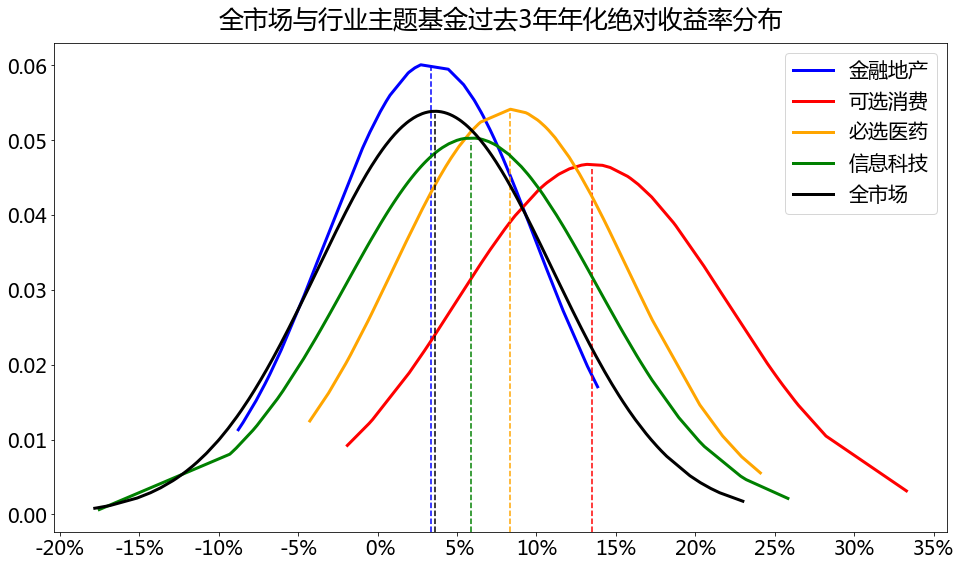

In [335]:
fig, ax = plt.subplots(figsize=(16, 9))

fin_h = sorted(fin_fund[u'三年年化收益率'].values)
fin_fit = stats.norm.pdf(fin_h, np.mean(fin_h), np.std(fin_h))
consume_h = sorted(consume_fund[u'三年年化收益率'].values)
consume_fit = stats.norm.pdf(consume_h, np.mean(consume_h), np.std(consume_h))
medic_h = sorted(medic_fund[u'三年年化收益率'].values)
medic_fit = stats.norm.pdf(medic_h, np.mean(medic_h), np.std(medic_h))
tech_h = sorted(tech_fund[u'三年年化收益率'].values)
tech_fit = stats.norm.pdf(tech_h, np.mean(tech_h), np.std(tech_h))
market_h = sorted(market_fund[u'三年年化收益率'].values)
market_fit = stats.norm.pdf(market_h, np.mean(market_h), np.std(market_h))

top = 0.063
ax.plot(fin_h, fin_fit, linewidth=3, label=u'金融地产', color='blue')
ax.axvline(x=np.mean(fin_h), ymax=fin_fit.max()/top, linestyle='--', color='blue')
ax.plot(consume_h, consume_fit, linewidth=3, label=u'可选消费', color='red')
ax.axvline(x=np.mean(consume_h), ymax=consume_fit.max()/top, linestyle='--', color='red')
ax.plot(medic_h, medic_fit, linewidth=3, label=u'必选医药', color='orange')
ax.axvline(x=np.mean(medic_h), ymax=medic_fit.max()/top, linestyle='--', color='orange')
ax.plot(tech_h, tech_fit, linewidth=3, label=u'信息科技', color='green')
ax.axvline(x=np.mean(tech_h), ymax=tech_fit.max()/top, linestyle='--', color='green')
ax.plot(market_h, market_fit, linewidth=3, label=u'全市场', color='black')
ax.axvline(x=np.mean(market_h), ymax=market_fit.max()/top, linestyle='--', color='black')
ax.legend(fontsize=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_ticks(range(-20, 40, 5))
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.0f}%'.format(x) for x in vals])

_ = ax.set_title(u'全市场与行业主题基金过去3年年化绝对收益率分布', fontsize=25, y=1.02)

In [336]:
bench = pd.read_excel(u'../data/股票型基金基准年化收益率.xlsx', index_col=1)

In [337]:
bench

,代码,三年年化收益率
名称,,
中证800,000906.SH,-0.284125
中证金融,000934.SH,2.117792
中证可选,000931.CSI,-4.386137
中证医药,000933.SH,0.254795
中证信息,000935.SH,0.416486


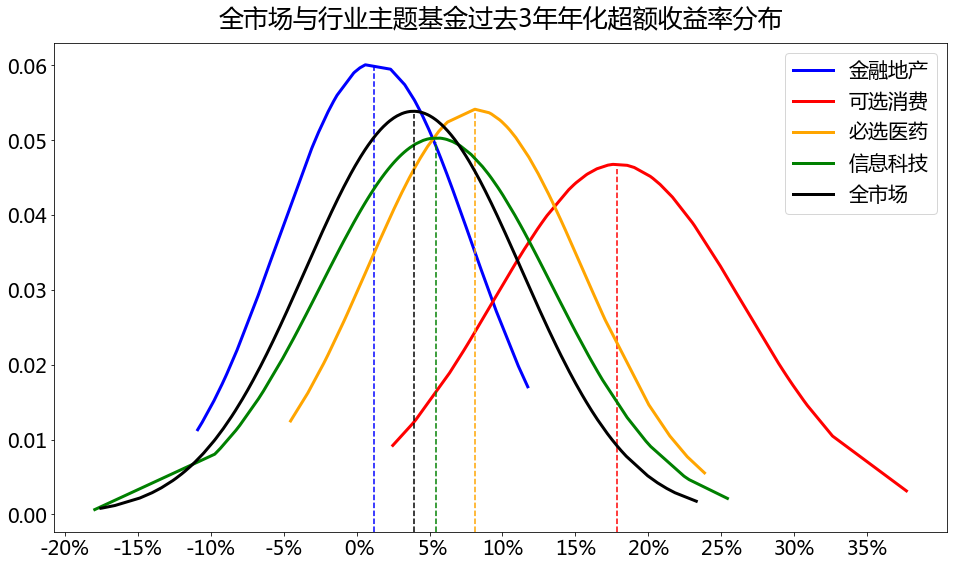

In [338]:
fig, ax = plt.subplots(figsize=(16, 9))

fin_h = sorted(fin_fund[u'三年年化收益率'].values - bench.loc[u'中证金融', u'三年年化收益率'])
fin_fit = stats.norm.pdf(fin_h, np.mean(fin_h), np.std(fin_h))
consume_h = sorted(consume_fund[u'三年年化收益率'].values - bench.loc[u'中证可选', u'三年年化收益率'])
consume_fit = stats.norm.pdf(consume_h, np.mean(consume_h), np.std(consume_h))
medic_h = sorted(medic_fund[u'三年年化收益率'].values - bench.loc[u'中证医药', u'三年年化收益率'])
medic_fit = stats.norm.pdf(medic_h, np.mean(medic_h), np.std(medic_h))
tech_h = sorted(tech_fund[u'三年年化收益率'].values - bench.loc[u'中证信息', u'三年年化收益率'])
tech_fit = stats.norm.pdf(tech_h, np.mean(tech_h), np.std(tech_h))
market_h = sorted(market_fund[u'三年年化收益率'].values - bench.loc[u'中证800', u'三年年化收益率'])
market_fit = stats.norm.pdf(market_h, np.mean(market_h), np.std(market_h))

top = 0.063
ax.plot(fin_h, fin_fit, linewidth=3, label=u'金融地产', color='blue')
ax.axvline(x=np.mean(fin_h), ymax=fin_fit.max()/top, linestyle='--', color='blue')
ax.plot(consume_h, consume_fit, linewidth=3, label=u'可选消费', color='red')
ax.axvline(x=np.mean(consume_h), ymax=consume_fit.max()/top, linestyle='--', color='red')
ax.plot(medic_h, medic_fit, linewidth=3, label=u'必选医药', color='orange')
ax.axvline(x=np.mean(medic_h), ymax=medic_fit.max()/top, linestyle='--', color='orange')
ax.plot(tech_h, tech_fit, linewidth=3, label=u'信息科技', color='green')
ax.axvline(x=np.mean(tech_h), ymax=tech_fit.max()/top, linestyle='--', color='green')
ax.plot(market_h, market_fit, linewidth=3, label=u'全市场', color='black')
ax.axvline(x=np.mean(market_h), ymax=market_fit.max()/top, linestyle='--', color='black')
ax.legend(fontsize=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_ticks(range(-20, 40, 5))
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.0f}%'.format(x) for x in vals])

_ = ax.set_title(u'全市场与行业主题基金过去3年年化超额收益率分布', fontsize=25, y=1.02)

In [339]:
writer = pd.ExcelWriter(u'../data/股票型基金行业分类.xlsx', engine='xlsxwriter')
market_fund.to_excel(writer, sheet_name=u'全市场')
fin_fund.to_excel(writer, sheet_name=u'金融地产')
consume_fund.to_excel(writer, sheet_name=u'可选消费')
medic_fund.to_excel(writer, sheet_name=u'必选医药')
tech_fund.to_excel(writer, sheet_name=u'信息科技')
other_eco_fund.to_excel(writer, sheet_name=u'其他经济敏感')
other_noneco_fund.to_excel(writer, sheet_name=u'其他经济不敏感')
writer.save()